In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn_dataset-training-master.csv', dtype={'CustomerID':str, "Age":str, "Tenure":str, "Usage Frequency":str, "Support Calls":str, "Payment Delay":str, "Last Interaction":str, "Churn":str})
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv', dtype={'CustomerID':str, "Age":str, "Tenure":str, "Usage Frequency":str, "Support Calls":str, "Payment Delay":str, "Last Interaction":str, "Churn":str})

In [3]:
df.dropna(inplace=True)


In [4]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.00,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.00,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.00,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.00,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.00,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995,42,Male,54,15,1,3,Premium,Annual,716.38,8,0
440829,449996,25,Female,8,13,1,20,Premium,Annual,745.38,2,0
440830,449997,26,Male,35,27,1,5,Standard,Quarterly,977.31,9,0
440831,449998,28,Male,55,14,2,0,Standard,Quarterly,602.55,2,0


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df_test.columns = df.columns.str.lower().str.replace(" ", "_")


In [6]:
strings = ['gender','subscription_type', 'contract_length']

In [7]:
for c in strings: 
    df[c] = df[c].str.lower().str.replace(" ", "_")
    df_test[c] = df_test[c].str.lower().str.replace(" ", "_")


In [8]:
ints = ['customerid', 'age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction']
for c in ints:
    df[ints] = df[ints].astype(int)
    df_test[ints] = df_test[ints].astype(int)
    

In [9]:
df.describe()

,customerid,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [12]:
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [13]:
len(df_val), len(df_train), len(df_test)

(110208, 330624, 64374)

In [14]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [15]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [16]:
df.churn.value_counts(normalize=True)

1    0.567107
0    0.432893
Name: churn, dtype: float64

In [17]:
categorical = ['gender','subscription_type', 'contract_length']
numerical = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction']

In [18]:
df_train[categorical].nunique()

gender               2
subscription_type    3
contract_length      3
dtype: int64

In [19]:
df['churn'] = df['churn'].astype(int)

In [20]:
df[df.gender == 'female'].churn.mean()

0.6666911533214398

In [21]:
df[df.gender == 'female'].churn

0         1
1         1
2         1
6         1
7         1
         ..
440813    0
440815    0
440817    0
440818    0
440829    0
Name: churn, Length: 190580, dtype: int32

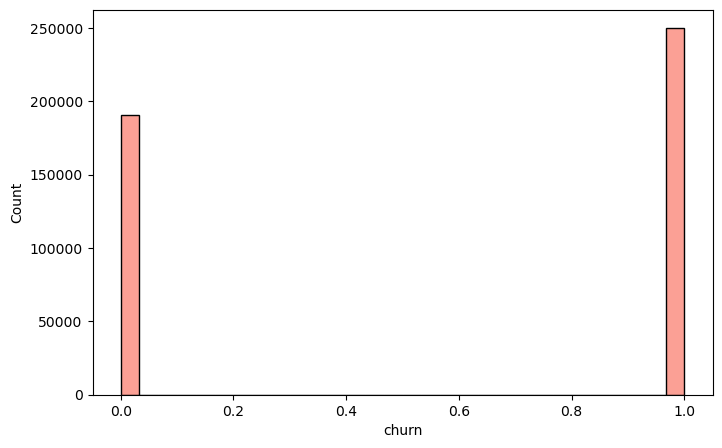

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['churn'], bins=30, color='salmon')  # `kde=True` adds a Kernel Density Estimate curve
plt.show()

In [23]:
df.churn.describe()

count    440832.000000
mean          0.567107
std           0.495477
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: churn, dtype: float64

In [24]:
global_churn = df.churn.mean()

In [25]:
df_group = df.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn

In [26]:
df_group

,mean,count,diff,risk
gender,,,,
female,0.666691,190580,0.099584,1.175600
male,0.491269,250252,-0.075838,0.866271


In [27]:
from IPython.display import display

In [28]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.666691,190580,0.099584,1.175600
male,0.491269,250252,-0.075838,0.866271


subscription_type


,mean,count,diff,risk
subscription_type,,,,
basic,0.581782,143026,0.014675,1.025877
premium,0.559417,148678,-0.007690,0.986440
standard,0.560700,149128,-0.006408,0.988701


contract_length


,mean,count,diff,risk
contract_length,,,,
annual,0.460761,177198,-0.106346,0.812477
monthly,1.000000,87104,0.432893,1.763335
quarterly,0.460256,176530,-0.106851,0.811586


In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.churn)

In [31]:
df[categorical].apply(mutual_info_churn_score).sort_values()

subscription_type    0.000212
gender               0.015543
contract_length      0.130430
dtype: float64

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [43]:
dicts_train = df_train[categorical + numerical].to_dict(orient='records')

In [51]:
dicts_train

[{'gender': 'female',
  'subscription_type': 'standard',
  'contract_length': 'annual',
  'age': 37,
  'tenure': 26,
  'usage_frequency': 27,
  'support_calls': 1,
  'payment_delay': 8,
  'last_interaction': 15},
 {'gender': 'female',
  'subscription_type': 'basic',
  'contract_length': 'annual',
  'age': 43,
  'tenure': 29,
  'usage_frequency': 3,
  'support_calls': 4,
  'payment_delay': 19,
  'last_interaction': 11},
 {'gender': 'female',
  'subscription_type': 'basic',
  'contract_length': 'annual',
  'age': 22,
  'tenure': 37,
  'usage_frequency': 22,
  'support_calls': 1,
  'payment_delay': 8,
  'last_interaction': 15},
 {'gender': 'male',
  'subscription_type': 'basic',
  'contract_length': 'quarterly',
  'age': 42,
  'tenure': 29,
  'usage_frequency': 27,
  'support_calls': 3,
  'payment_delay': 7,
  'last_interaction': 24},
 {'gender': 'female',
  'subscription_type': 'standard',
  'contract_length': 'quarterly',
  'age': 36,
  'tenure': 34,
  'usage_frequency': 24,
  'support_

In [53]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts_train)

DictVectorizer(sparse=False)

In [45]:
dv.get_feature_names()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'contract_length=annual',
 'contract_length=monthly',
 'contract_length=quarterly',
 'gender=female',
 'gender=male',
 'last_interaction',
 'payment_delay',
 'subscription_type=basic',
 'subscription_type=premium',
 'subscription_type=standard',
 'support_calls',
 'tenure',
 'usage_frequency']

In [46]:
X_train = dv.transform(dicts_train)

In [47]:
X_train.shape

(330624, 14)

In [48]:
X_train

array([[37.,  1.,  0., ...,  1., 26., 27.],
       [43.,  1.,  0., ...,  4., 29.,  3.],
       [22.,  1.,  0., ...,  1., 37., 22.],
       ...,
       [25.,  1.,  0., ...,  1., 55., 30.],
       [37.,  0.,  0., ...,  2.,  9., 11.],
       [19.,  1.,  0., ...,  9.,  9., 23.]])

In [49]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [50]:
X_val = dv.transform(val_dicts)

In [57]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [60]:
z = np.linspace(-5,5,51)

In [61]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

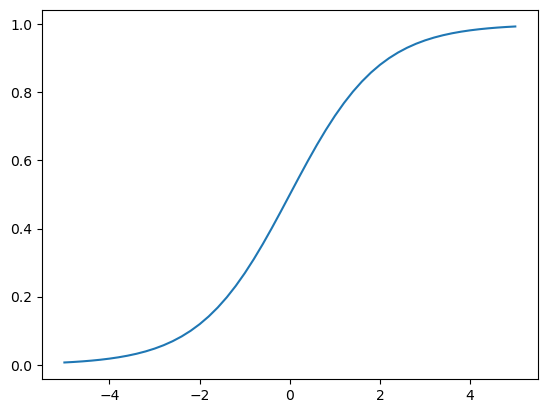

In [63]:
plt.plot(z,sigmoid(z))

In [64]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
model.predict_proba(X_train)

array([[0.81608351, 0.18391649],
       [0.10521998, 0.89478002],
       [0.86404246, 0.13595754],
       ...,
       [0.9280314 , 0.0719686 ],
       [0.89118922, 0.10881078],
       [0.01031181, 0.98968819]])

In [104]:
y_pred = model.predict_proba(X_val)[:,1]
len(y_pred)

110208

In [105]:
churn_decision = (y_pred >= 0.5)

In [106]:
churn_decision = churn_decision.astype(int)

In [107]:
y_val = y_val.astype(int)

In [109]:
(churn_decision == y_val).mean()

0.8628320993031359

In [161]:
model.coef_

array([[ 0.03390133, -3.71147207,  6.66553409, -3.7151875 ,  0.16329398,
        -0.92441946,  0.05730558,  0.1055141 , -0.17561971, -0.29583014,
        -0.28967562,  0.68453577, -0.00719448, -0.01392944]])

In [113]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'age': 0.035,
 'contract_length=annual': -2.473,
 'contract_length=monthly': 3.576,
 'contract_length=quarterly': -2.519,
 'gender=female': -0.162,
 'gender=male': -1.254,
 'last_interaction': 0.058,
 'payment_delay': 0.104,
 'subscription_type=basic': -0.361,
 'subscription_type=premium': -0.529,
 'subscription_type=standard': -0.525,
 'support_calls': 0.671,
 'tenure': -0.007,
 'usage_frequency': -0.015}

In [115]:
df_train

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
425978,433093,37,female,26,27,1,8,standard,annual,999.87,15
422060,429175,43,female,29,3,4,19,basic,annual,979.99,11
340177,347292,22,female,37,22,1,8,basic,annual,917.36,15
332444,339559,42,male,29,27,3,7,basic,quarterly,973.97,24
373161,380276,36,female,34,24,0,12,standard,quarterly,958.67,5
...,...,...,...,...,...,...,...,...,...,...,...
73349,75152,38,female,27,2,6,3,premium,quarterly,447.00,19
371404,378519,28,male,31,10,1,11,premium,annual,529.51,28
312202,319317,25,male,55,30,1,8,basic,annual,799.51,24
267337,274451,37,male,9,11,2,5,basic,quarterly,905.16,9


In [116]:
dicts_full_train = df[categorical + numerical].to_dict(orient='records')

In [119]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df.churn.values

In [121]:
model = LogisticRegression(max_iter =1000).fit(X_full_train, y_full_train )

In [123]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [124]:
X_test = dv.transform(dicts_test)

In [128]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.99999572, 0.99999906, 0.76745985, ..., 0.99999964, 0.99999967,
       0.99999996])

In [136]:
churn_decision = (y_pred >= 0.7)
churn_decision = churn_decision.astype(int)
y_test = y_test.astype(int)

In [137]:
(churn_decision == y_test).mean()

0.6215552862957094

In [154]:
customer = dicts_test[3]
customer

{'gender': 'male',
 'subscription_type': 'premium',
 'contract_length': 'quarterly',
 'age': 35,
 'tenure': 9,
 'usage_frequency': 12,
 'support_calls': 5,
 'payment_delay': 17,
 'last_interaction': 18}

In [155]:
X_small = dv.transform([customer])

In [156]:
model.predict_proba(X_small)[0,1]

0.8176721495292221

In [157]:
y_test[10]

1